In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

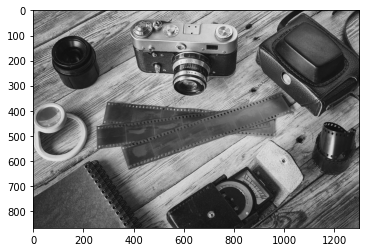

In [16]:
img = cv2.imread('../../images/table.png', 0)
plt.imshow(img, cmap='gray');

# Gaussian Blur (Remove noise)

In [17]:
# implement Gaussian blur
def gaussian_blur(img, kernel_size):
    kernel = np.zeros((kernel_size, kernel_size))
    sigma = kernel_size / 2
    center = kernel_size // 2 
    sum_val = 0
    
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
            sum_val += kernel[i, j]
    kernel /= sum_val
    
    output = cv2.filter2D(img, -1, kernel)
    return output, kernel

In [18]:
blur_img, kernel = gaussian_blur(img, 5)
plt.imsave('gaussian-blur.png', blur_img, cmap='gray')

In [19]:
kernel

array([[0.02853721, 0.0362779 , 0.03929938, 0.0362779 , 0.02853721],
       [0.0362779 , 0.04611825, 0.0499593 , 0.04611825, 0.0362779 ],
       [0.03929938, 0.0499593 , 0.05412027, 0.0499593 , 0.03929938],
       [0.0362779 , 0.04611825, 0.0499593 , 0.04611825, 0.0362779 ],
       [0.02853721, 0.0362779 , 0.03929938, 0.0362779 , 0.02853721]])

# Add gaussian noise

In [ ]:
# add gaussian noise
def add_gaussian_noise(img, mean, std):
    noise = np.random.normal(mean, std, img.shape)
    output = img + noise
    output = np.clip(output, 0, 255)
    output = output.astype(np.uint8)
    return output

In [ ]:
noisy_img = add_gaussian_noise(img, 0, 30)
plt.imsave('gaussian-noise.png', noisy_img, cmap='gray')